In [30]:
import pandas as pd
import numpy as np
from datetime import datetime
import os
from simulation import Simulation
from glob import glob
from matplotlib import pyplot as plt
from matplotlib import ticker

In [31]:
data_files = sorted(glob('../../outputs/numpy_arrays/*transition*'))

In [32]:
numpy_fname = data_files[0]
transition_nums_fname = sorted(glob('../../outputs/transition_numbers/*transition*'))[0]
numpy_fname, transition_nums_fname

('../../outputs/numpy_arrays/transitions_2021-12-06_13-59-12-037445.npy',
 '../../outputs/transition_numbers/transitions_2021-12-06_13-59-12-037445.npy')

In [33]:
data_arr = np.load(numpy_fname)
transitions_arr = np.load(transition_nums_fname)
transitions_arr[0]

array([1.11328190e+08, 6.81145547e+05, 4.00035627e+05, 7.52276910e+05,
       3.25953559e+05, 2.94415628e+07, 1.07652420e+06, 1.94652130e+06,
       2.86366031e+05, 5.67588637e+05, 1.12780097e+07, 7.69218893e+05,
       5.61712686e+05, 1.54328587e+06, 9.28458543e+05, 1.84403023e+07,
       9.97348007e+05, 2.04375748e+05, 3.41052725e+05, 1.03506678e+06,
       1.31277176e+06, 3.49238113e+06])

In [34]:
raw_columns = [
    "1->1",
    "1->2",
    "1->3",
    "1->4",
    "1->5",
    "2->2",
    "2->3",
    "2->4",
    "2->5",
    "3->2",
    "3->3",
    "3->4",
    "3->5",
    "4->2",
    "4->3",
    "4->4",
    "4->5",
    "5->1",
    "5->2",
    "5->3",
    "5->4",
    "5->5",
]

processed_columns = [ 
    "Never Smokers",
    "Former Smokers",
    "Menthol Smokers",
    "Non-menthol Smokers",
    "E-cig/Dual Users",
    "Menthol smokers who transitioned to former smokers",
    "Percentage of menthol smokers who transitioned to former smokers",
    "Non-menthol smokers who transitioned to former smokers",
    "Percentage of non-menthol smokers who transitioned to former smokers",
    "E-cig/dual users who transitioned to former smokers",
    "Percentage of e-cig/dual users who transitioned to former smokers",
]

In [35]:
data_arr.shape, transitions_arr.shape

((51, 2, 2, 6), (50, 22))

In [36]:
year_state_arr = np.sum(data_arr, axis=(1,2))
year_state_arr.shape

(51, 6)

In [38]:
print(year_state_arr[1])

[1.11532566e+08 3.25746356e+07 1.47180948e+07 2.32210912e+07
 5.66376141e+06 7.20636336e+05]


In [39]:
print(np.sum([transitions_arr[0,i] for i in [0, 17]]))
print(np.sum([transitions_arr[0,i] for i in [1,5,9,13,18]]))
print(np.sum([transitions_arr[0,i] for i in [2,6,10,14,19]]))
print(np.sum([transitions_arr[0,i] for i in [3,7,11,15,20]]))
print(np.sum([transitions_arr[0,i] for i in [4,8,12,16,21]]))

111532566.21200243
32574635.58535437
14718094.840848563
23221091.153955705
5663761.4079324985


In [41]:
processed_output = []
for i, row in enumerate(transitions_arr):
    processed_output.append([
        year_state_arr[i, 0],
        year_state_arr[i, 1],
        year_state_arr[i, 2],
        year_state_arr[i, 3],
        year_state_arr[i, 4],
        transitions_arr[i, 9],
        100.0 * transitions_arr[i, 9] / year_state_arr[i,2],
        transitions_arr[i, 13],
        100.0 * transitions_arr[i, 13] / year_state_arr[i,3],
        transitions_arr[i, 18],
        100.0 * transitions_arr[i, 18] / year_state_arr[i,4],
     ])

In [46]:
raw_columns.__len__()
transitions_arr.shape

(50, 22)

In [47]:
processed_output = np.asarray(processed_output)

In [49]:
processed_columns.__len__()

11

In [54]:
processed_output

array([[1.13753158e+08, 3.30602554e+07, 1.32174240e+07, 2.20002919e+07,
        6.39965650e+06, 5.67588637e+05, 4.29424552e+00, 1.54328587e+06,
        7.01484271e+00, 3.41052725e+05, 5.32923486e+00],
       [1.11532566e+08, 3.25746356e+07, 1.47180948e+07, 2.32210912e+07,
        5.66376141e+06, 8.41764538e+05, 5.71924931e+00, 2.06690059e+06,
        8.90096237e+00, 3.74102210e+05, 6.60519013e+00],
       [1.09748865e+08, 3.32926764e+07, 1.65203791e+07, 2.28980272e+07,
        4.67014204e+06, 9.95683512e+05, 6.02700161e+00, 1.93430167e+06,
        8.44745989e+00, 4.49381365e+05, 9.62243463e+00],
       [1.07509384e+08, 3.41645014e+07, 1.61174780e+07, 2.36996037e+07,
        4.91475633e+06, 9.55279429e+05, 5.92697835e+00, 2.12563348e+06,
        8.96906762e+00, 3.70092385e+05, 7.53022856e+00],
       [1.05515645e+08, 3.48883764e+07, 1.62507500e+07, 2.40206983e+07,
        4.84985659e+06, 1.07538727e+06, 6.61746243e+00, 2.14172852e+06,
        8.91617928e+00, 3.06889575e+05, 6.32780721e+

In [56]:

raw_df = pd.DataFrame(data=transitions_arr, index=[f"year_{i+1}" for i in range(transitions_arr.shape[0])], columns=raw_columns)
processed_df = pd.DataFrame(data=processed_output, index=[f"year_{i+1}" for i in range(processed_output.shape[0])], columns=processed_columns)

In [55]:
from IPython.display import display, HTML
display(raw_df)

,1->1,1->2,1->3,1->4,1->5,2->2,2->3,2->4,2->5,3->2,...,3->5,4->2,4->3,4->4,4->5,5->1,5->2,5->3,5->4,5->5
year_1,1.113282e+08,681145.547297,400035.627323,752276.909784,325953.559468,2.944156e+07,1.076524e+06,1.946521e+06,286366.030630,5.675886e+05,...,561712.685866,1.543286e+06,9.284585e+05,1.844030e+07,9.973480e+05,204375.748305,341052.725209,1.035067e+06,1.312772e+06,3.492381e+06
year_2,1.095007e+08,516248.746277,342754.720679,518208.533696,339732.461764,2.949366e+07,1.275695e+06,1.455099e+06,216010.184592,8.417645e+05,...,331343.810105,2.066901e+06,1.347084e+06,1.914475e+07,5.948590e+05,248182.776068,374102.209705,7.850090e+05,1.049648e+06,3.188197e+06
year_3,1.072237e+08,704448.994332,388589.219817,651686.573841,381627.371065,3.008069e+07,9.390518e+05,1.777669e+06,329299.749616,9.956835e+05,...,684588.872192,1.934302e+06,7.812196e+05,1.915544e+07,9.129043e+05,285728.255826,449381.365080,5.826693e+05,7.338979e+05,2.606336e+06
year_4,1.052630e+08,584625.345266,296750.636928,630767.489644,232241.670622,3.085275e+07,9.050119e+05,1.889755e+06,383107.342301,9.552794e+05,...,602543.900289,2.125633e+06,1.013718e+06,1.948585e+07,9.013982e+05,252648.097266,370092.385132,6.993032e+05,8.621471e+05,2.730565e+06
year_5,1.032613e+08,468831.626953,301561.848698,833429.065616,282667.213470,3.121421e+07,1.018713e+06,2.049503e+06,377021.035600,1.075387e+06,...,693194.822862,2.141729e+06,9.027500e+05,1.997459e+07,9.061503e+05,143065.233311,306889.575030,6.937676e+05,1.017403e+06,2.664342e+06
year_6,1.012380e+08,589483.688496,284558.310869,507164.774922,279410.828069,3.169710e+07,1.012381e+06,2.004991e+06,272960.043188,1.060271e+06,...,721410.869496,2.212486e+06,9.698067e+05,2.090965e+07,8.773883e+05,203349.880083,370714.086039,7.319709e+05,9.070303e+05,2.686181e+06
year_7,9.935833e+07,550311.390664,257738.293561,434328.808689,237485.008188,3.240310e+07,8.651815e+05,2.157649e+06,300350.923778,9.320431e+05,...,625239.111661,2.165750e+06,9.156376e+05,2.153489e+07,8.242061e+05,197988.420119,279289.120855,7.798151e+05,8.499430e+05,2.711831e+06
year_8,9.756938e+07,606655.795715,240968.277554,512309.824510,222635.772486,3.231314e+07,1.062453e+06,2.275819e+06,372158.582226,1.110186e+06,...,606241.039531,2.249102e+06,8.815885e+05,2.220691e+07,7.664745e+05,159941.907784,307904.762781,6.197473e+05,7.896280e+05,2.788963e+06
year_9,9.580569e+07,506851.071105,183656.705256,582738.061196,241614.868536,3.294325e+07,8.959285e+05,2.181601e+06,257403.748180,9.470154e+05,...,615212.717645,2.227135e+06,9.166513e+05,2.274366e+07,8.707847e+05,131420.671203,254673.871037,7.172502e+05,8.790544e+05,2.762366e+06
year_10,9.392208e+07,517082.734609,249204.587057,354683.822461,188221.914884,3.348036e+07,7.154910e+05,2.149008e+06,300348.632826,1.010831e+06,...,694809.354971,2.464510e+06,8.015343e+05,2.333369e+07,7.888134e+05,231763.375800,376401.498369,6.162726e+05,1.004387e+06,2.518558e+06


In [57]:
display(processed_df)

,Never Smokers,Former Smokers,Menthol Smokers,Non-menthol Smokers,E-cig/Dual Users,Menthol smokers who transitioned to former smokers,Percentage of menthol smokers who transitioned to former smokers,Non-menthol smokers who transitioned to former smokers,Percentage of non-menthol smokers who transitioned to former smokers,E-cig/dual users who transitioned to former smokers,Percentage of e-cig/dual users who transitioned to former smokers
year_1,1.137532e+08,3.306026e+07,1.321742e+07,2.200029e+07,6.399657e+06,5.675886e+05,4.294246,1.543286e+06,7.014843,341052.725209,5.329235
year_2,1.115326e+08,3.257464e+07,1.471809e+07,2.322109e+07,5.663761e+06,8.417645e+05,5.719249,2.066901e+06,8.900962,374102.209705,6.605190
year_3,1.097489e+08,3.329268e+07,1.652038e+07,2.289803e+07,4.670142e+06,9.956835e+05,6.027002,1.934302e+06,8.447460,449381.365080,9.622435
year_4,1.075094e+08,3.416450e+07,1.611748e+07,2.369960e+07,4.914756e+06,9.552794e+05,5.926978,2.125633e+06,8.969068,370092.385132,7.530229
year_5,1.055156e+08,3.488838e+07,1.625075e+07,2.402070e+07,4.849857e+06,1.075387e+06,6.617462,2.141729e+06,8.916179,306889.575030,6.327807
year_6,1.034044e+08,3.520705e+07,1.615077e+07,2.508582e+07,4.923375e+06,1.060271e+06,6.564836,2.212486e+06,8.819665,370714.086039,7.529674
year_7,1.014413e+08,3.593005e+07,1.609130e+07,2.558172e+07,4.837351e+06,9.320431e+05,5.792216,2.165750e+06,8.466007,279289.120855,5.773596
year_8,9.955631e+07,3.633049e+07,1.598492e+07,2.629304e+07,4.699112e+06,1.110186e+06,6.945207,2.249102e+06,8.553982,307904.762781,6.552403
year_9,9.772932e+07,3.658699e+07,1.586009e+07,2.695939e+07,4.756473e+06,9.470154e+05,5.971059,2.227135e+06,8.261074,254673.871037,5.354259
year_10,9.593712e+07,3.687893e+07,1.572886e+07,2.758427e+07,4.747382e+06,1.010831e+06,6.426598,2.464510e+06,8.934474,376401.498369,7.928611


In [58]:
print(os.getcwd())

/home/nick/Gillings_work/menthol-model/menthol-model


In [59]:
raw_df.to_excel("analyses/raw_transition_data.xlsx")
processed_df.to_excel("analyses/processed_transition_data.xlsx")


In [60]:
year_state_arr /= 1e6

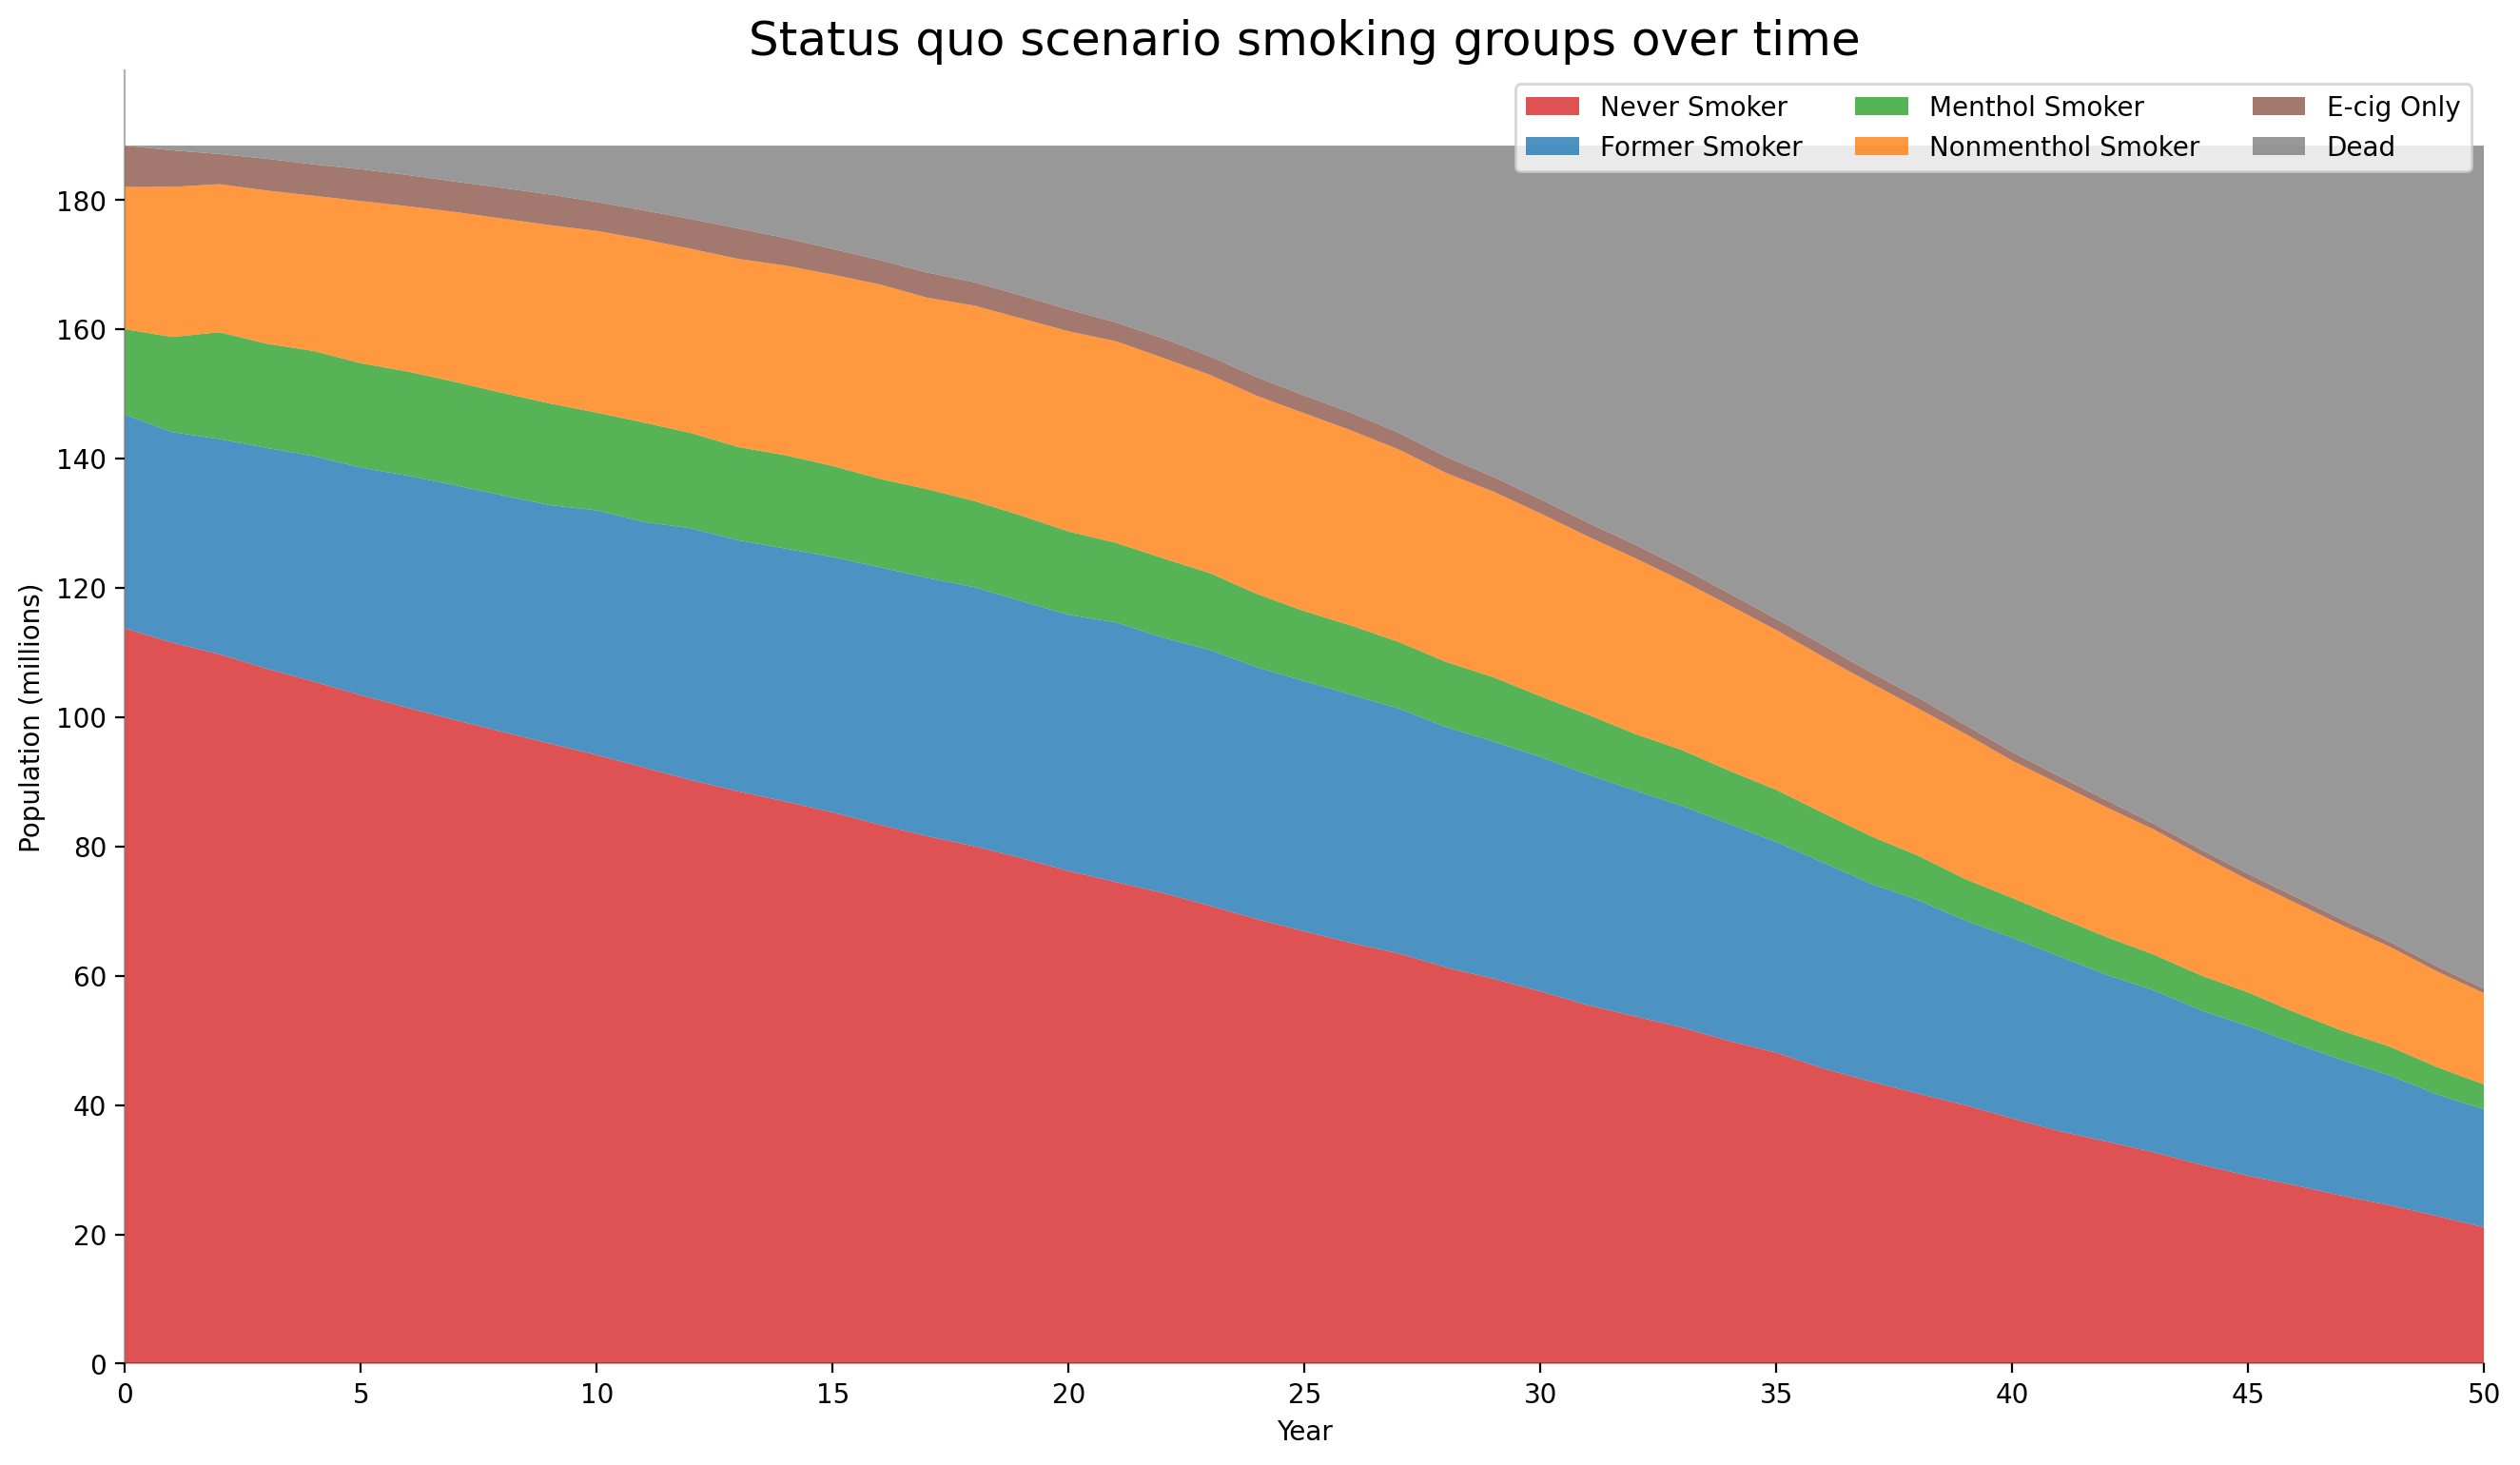

In [61]:
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey',]

fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)
labels = ["Never Smoker", "Former Smoker", "Menthol Smoker", "Nonmenthol Smoker", "E-cig Only", "Dead"]

x = np.arange(year_state_arr.shape[0])
y = np.vstack([year_state_arr[:,i] for i in range(year_state_arr.shape[1])])

ax = plt.gca()
ax.stackplot(x,y,labels=labels, colors=mycolors, alpha=0.8)

ax.set_title('Status quo scenario smoking groups over time', fontsize=18)
ax.set(ylim=[0, 2e2])
ax.legend(fontsize=10, ncol=3)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0,2e2,2e1,dtype=np.int64), fontsize=10)
plt.xlim(x[0], x[-1])
plt.xlabel("Year")
plt.ylabel("Population (millions)")

plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

In [62]:
arr_no_dead = year_state_arr[:,:-1]

arr_no_dead_percents = arr_no_dead / np.sum(arr_no_dead, axis=1).reshape(-1,1) * 100

Text(0.5, 1.0, 'Proportion of smoking groups in the living population')

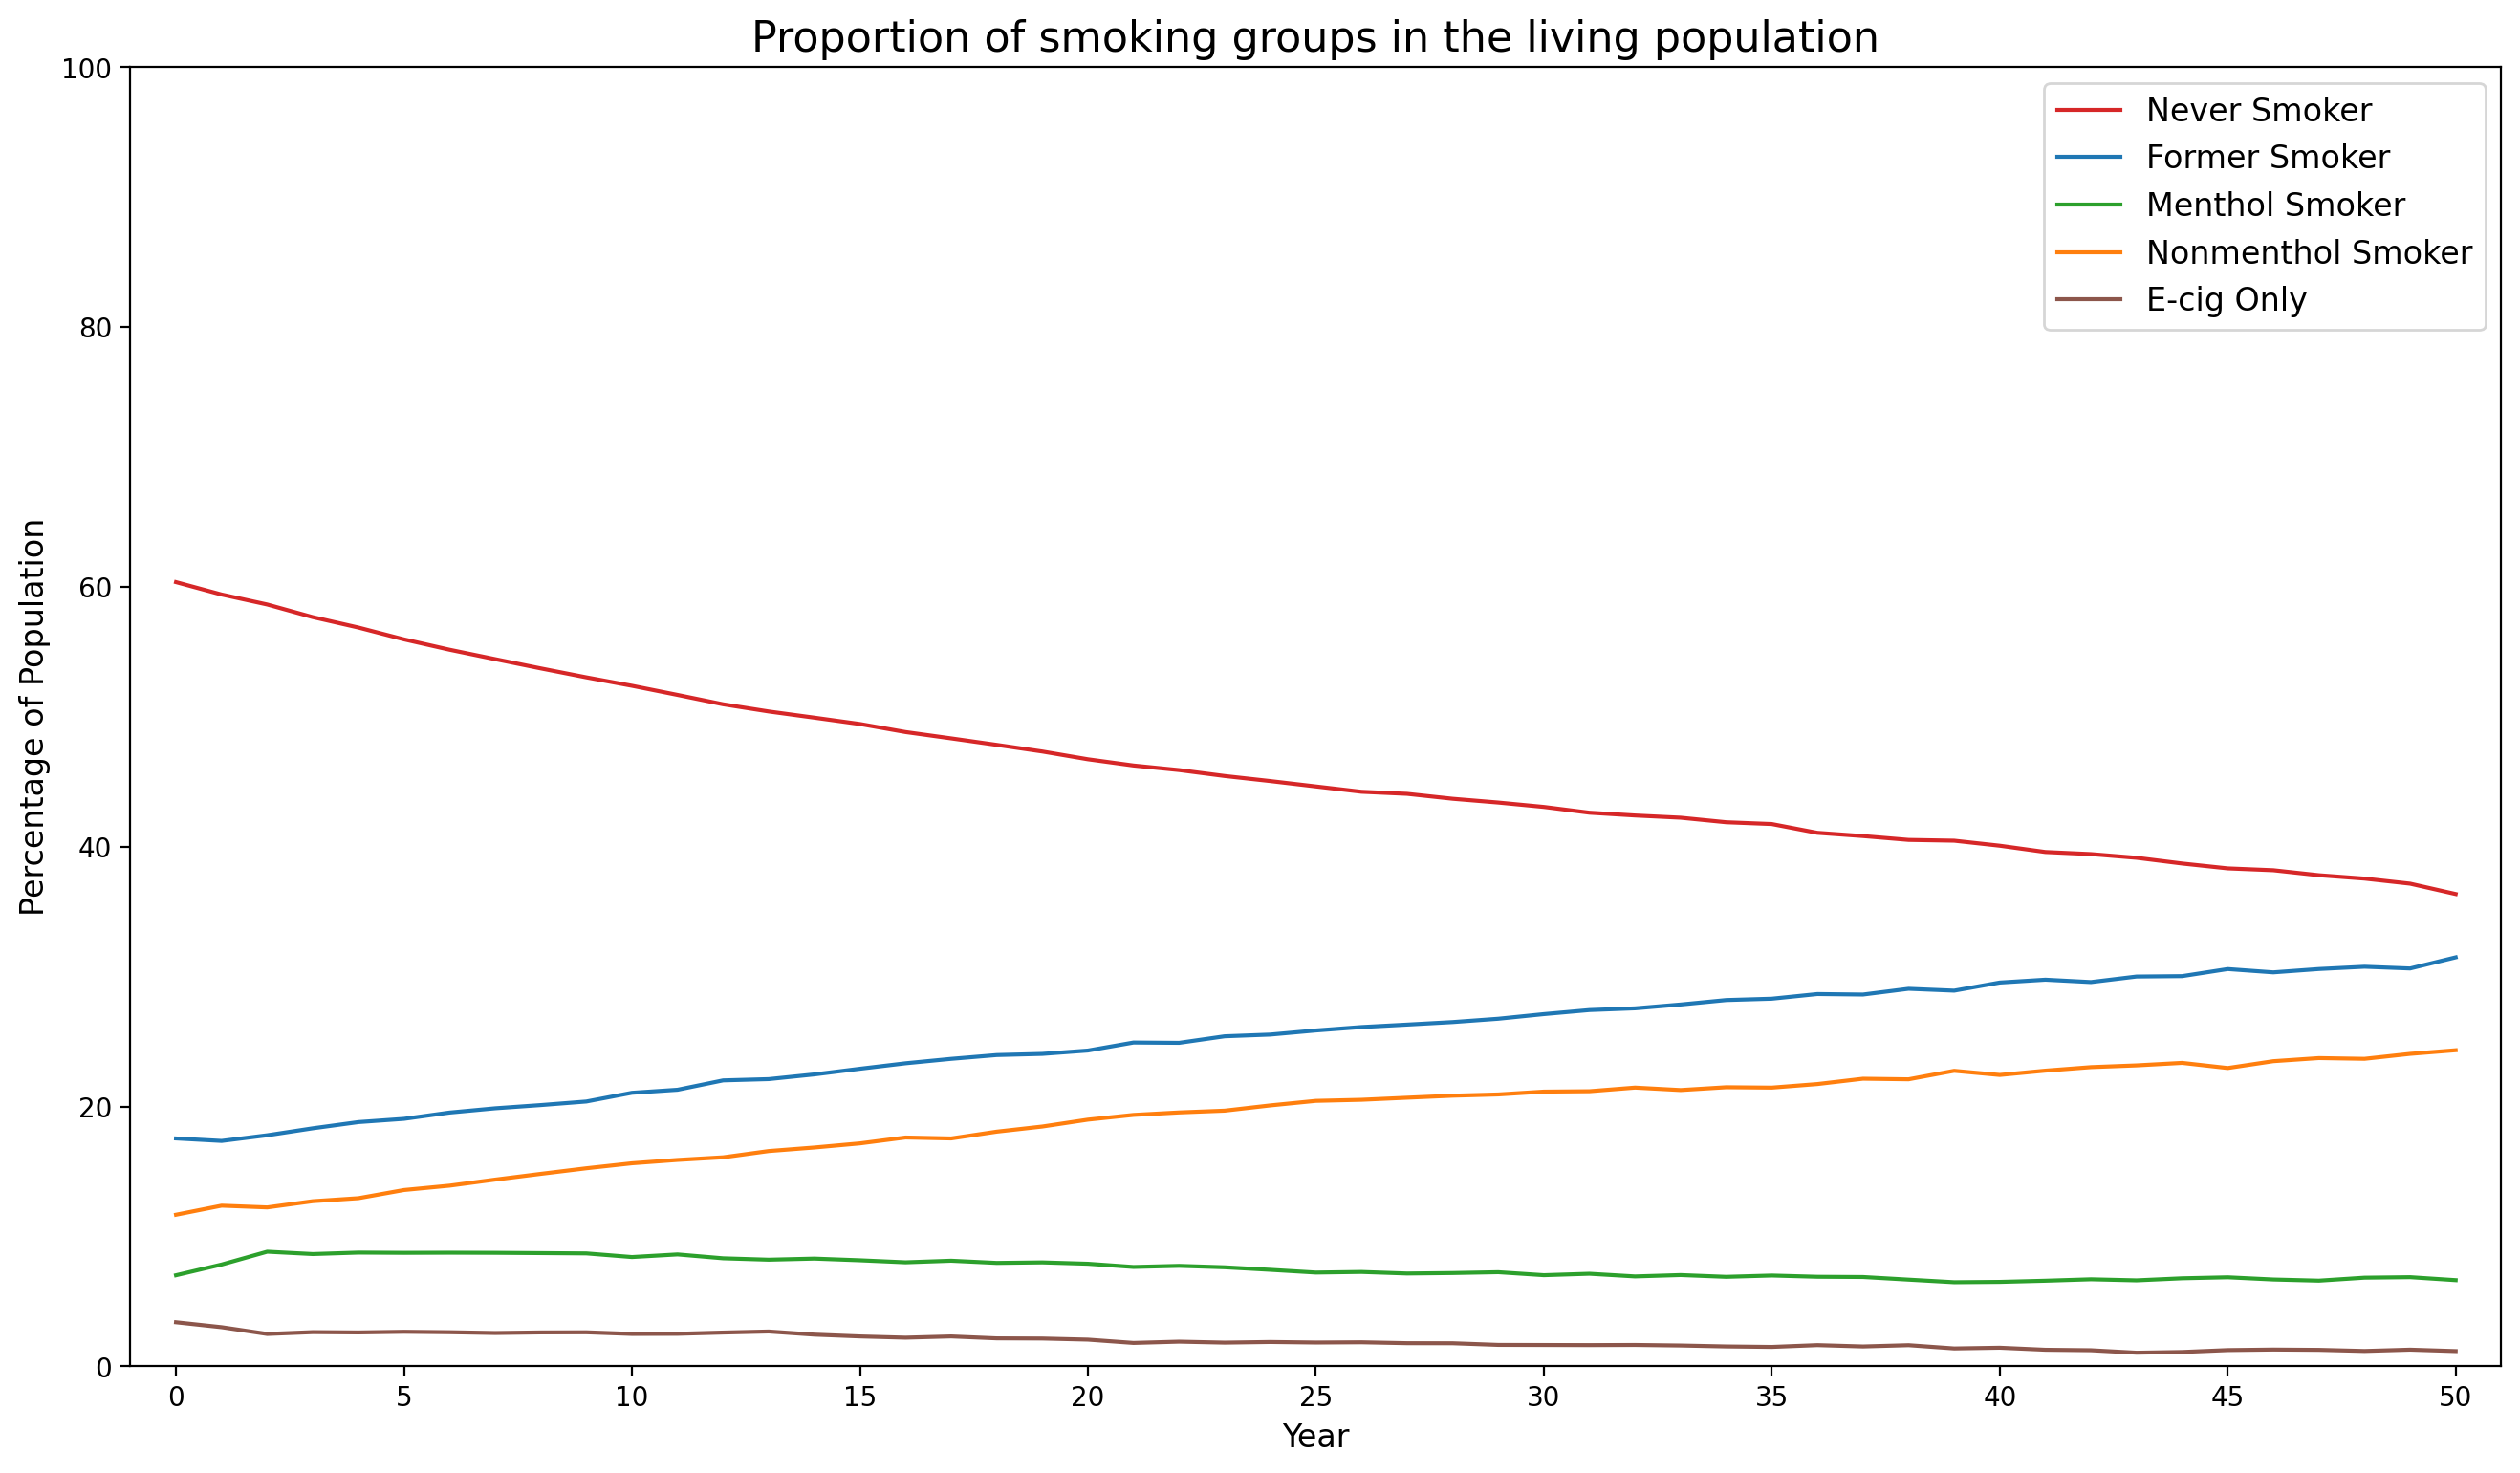

In [63]:
fig, ax = plt.subplots(1,1,figsize=(16,9), dpi=200)
ax.plot(x, arr_no_dead_percents[:,0], mycolors[0],
        x, arr_no_dead_percents[:,1], mycolors[1],
        x, arr_no_dead_percents[:,2], mycolors[2],
        x, arr_no_dead_percents[:,3], mycolors[3],
        x, arr_no_dead_percents[:,4], mycolors[4])

plt.ylim(0,100)
plt.xlim(x[0]-1, x[-1]+1)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Percentage of Population", fontsize=12)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
ax.legend(labels, fontsize=12, ncol=1)

plt.title("Proportion of smoking groups in the living population", fontsize=16)

# for i in range(len(mycolors)-1):
#         ax.get_lines()[i].set_color(mycolors[i])

# len(ax.get_lines())
# len(mycolors)